In [1]:
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import csv
f = open("datafiles/IL_Building_Inventory.csv")
reader = csv.reader(f)
header = next(reader)
data = {}
for column in header:
    data[column] = []
for record in reader:
    for name, value in zip(header, record):
        data[name].append(value)

data["Square Footage"] = np.array(data['Square Footage'], dtype="float")
data["Year Constructed"] = np.array(data["Year Constructed"], dtype='int')
data["Year Acquired"] = np.array(data["Year Acquired"], dtype='int')

In [4]:
data

{'Address': ['Anderson Lake C.a.',
  'Anderson Lake C.a.',
  'Anderson Lake C.a.',
  'Anderson Lake C.a.',
  'Anderson Lake C.a.',
  'Anderson Lake C.a.',
  'Rr #2',
  'Rr #2',
  'R. R. 178, Box 509',
  'R. R. 178, Box 509',
  'R. R. 178, Box 509',
  'R. R. 178, Box 509',
  'Keyesport Road',
  'P.o. Box 203',
  'P.o. Box 203',
  'P.o. Box 203',
  'P.o. Box 203',
  'P.o. Box 203',
  'P.o. Box 203',
  'P.o. Box 203',
  'P.o. Box 203',
  'R.r. 1 Box 99',
  'R.r. 1 Box 99',
  'Route 17 West',
  '1125 North Collins Street',
  '950 Kingshighway P.o. Box 50',
  '1518 East 1800 North Road',
  '2 Miles East Of Mason',
  '2515 N. 23rd. Road',
  'Route #2, Box 306',
  'Route #2, Box 306',
  'Route #2, Box 306',
  "Governor's Hwy & Univ Pkwy",
  "Governor's Hwy & Univ Pkwy",
  "Governor's Hwy & Univ Pkwy",
  '14548 Beaver Dam Lane',
  '650 East Taintor Road',
  'Rr #2, Box 250',
  'Rr #2, Box 250',
  'Rr #2, Box 250',
  'Rr #2, Box 250',
  'Rr #2, Box 250',
  'Rr #2, Box 250',
  'Rr #2, Box 250',


In [6]:
def f(x):
    return x;

In [9]:
import ipywidgets
ipywidgets.interact(f,x=10)

10

<function __main__.f>

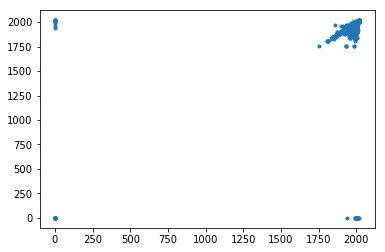

In [10]:
plt.plot(data["Year Acquired"], data["Year Constructed"],'.')

In [11]:
def filter_greater(dataset, column, value): 
    good_vals = dataset[column] > value
    filtered_dataset = {}
    for col in dataset: 
        filtered_dataset[col] = dataset[col][good_vals]
    
    return filtered_dataset

In [12]:
dataset = {"Year Acquired" : data['Year Acquired'], 
           "Year Constructed" : data['Year Constructed'],
           'Square Footage':data['Square Footage'],
           'Building Age' : data['Year Acquired'] - data['Year Constructed']
           }

In [13]:
dataset

{'Building Age': array([    0,     0,     0, ..., -1987,     0, -2017]),
 'Square Footage': array([   144.,    144.,    144., ...,    130.,  49552.,    288.]),
 'Year Acquired': array([1975, 2004, 2004, ...,    0, 1971,    0]),
 'Year Constructed': array([1975, 2004, 2004, ..., 1987, 1971, 2017])}

In [15]:
filtered = filter_greater(dataset,'Year Acquired', 1800)

In [16]:
filtered

{'Building Age': array([0, 0, 0, ..., 0, 0, 0]),
 'Square Footage': array([   144.,    144.,    144., ...,    760.,    760.,  49552.]),
 'Year Acquired': array([1975, 2004, 2004, ..., 2019, 2019, 1971]),
 'Year Constructed': array([1975, 2004, 2004, ..., 2019, 2019, 1971])}

In [17]:
filtered = filter_greater(filtered,'Year Constructed', 1800)

In [18]:
filtered

{'Building Age': array([0, 0, 0, ..., 0, 0, 0]),
 'Square Footage': array([   144.,    144.,    144., ...,    760.,    760.,  49552.]),
 'Year Acquired': array([1975, 2004, 2004, ..., 2019, 2019, 1971]),
 'Year Constructed': array([1975, 2004, 2004, ..., 2019, 2019, 1971])}

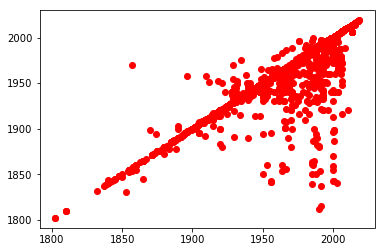

In [25]:
plt.plot(filtered['Year Acquired'], filtered['Year Constructed'], 'ro')

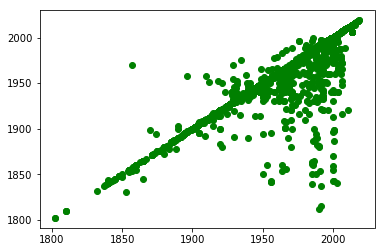

In [26]:
plt.plot(filtered['Year Acquired'], filtered['Year Constructed'], 'go')

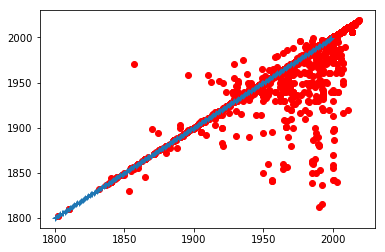

In [30]:
plt.plot(filtered['Year Acquired'], filtered['Year Constructed'], 'ro')
plt.plot(np.arange(1800,2000), np.arange(1800,2000), '+')

(0, 200)

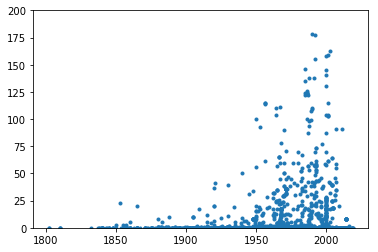

In [32]:
plt.plot(filtered["Year Acquired"], filtered['Building Age'], '.')
plt.ylim(0, 200)

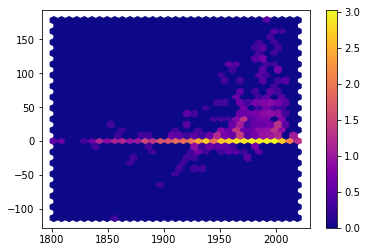

In [33]:
plt.hexbin(filtered["Year Acquired"], filtered["Building Age"], gridsize=32, bins = 'log')
plt.colorbar()

In [41]:
def make_plot(gridsize, cmap, style):
    with plt.style.context(style):
        plt.hexbin(filtered["Year Acquired"], filtered['Building Age'],
                   gridsize=gridsize, bins = 'log',
                   cmap = cmap)
        plt.colorbar()

In [39]:
import ipywidgets

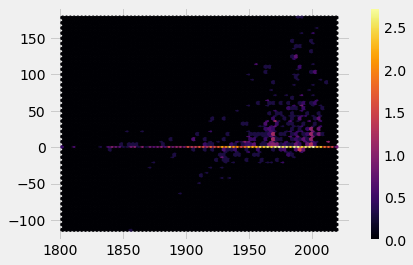

In [51]:
ipywidgets.interact(make_plot, gridsize = (16, 128, 1),
                   cmap = ["viridis", "inferno", "magma", "flag", "jet","red", "winter_r","cubehelix_r"],
                   style = ["fivethirtyeight", "default", "ggplot", "seaborn"]
                   )

In [52]:
years = [2012, 2013, 2014, 2015, 2016]
complaints = [3750, 3450, 2975, 2750, 2760]

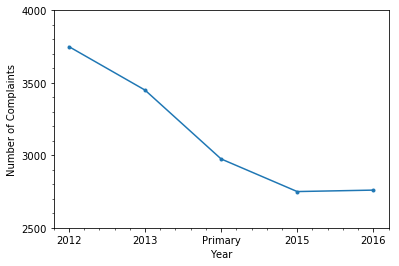

In [53]:
plt.plot(years, complaints, '.-')
plt.xticks( [2012, 2013, 2014, 2015, 2016],
            ['2012', '2013', 'Primary', '2015', '2016'])
plt.yticks( [2500, 3000, 3500, 4000])
plt.minorticks_on()
plt.xlabel("Year")
plt.ylabel("Number of Complaints")